# Emotion Recognition By Text






1.   Text Analysis
2.   Sentiment Analysis




### Importing Necessary **Libraries**

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Sentimental Anaylisi
from textblob import TextBlob

# Additional libraries
!pip install neattext
import neattext.functions as nfx
from collections import Counter

# Load Text Cleaning Pkgs
!pip install wordcloud
from wordcloud import WordCloud

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.7/114.7 kB 3.4 MB/s eta 0:00:00


### Loading The **Dataset**

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/Jaggenaut/Emotion_detection-by-text/main/emotion_dataset_raw.csv")

# Defining The **Functions**

### All the functions used below are defined here.

### ***`To Perform Sentimental Analysis Using TextBlob`***

In [3]:
# Sentimental Anaylisi
from textblob import TextBlob
# Function to perform sentiment analysis using TextBlob
def get_sentiment(text):
    # Create a TextBlob object to analyze sentiment in the given text
    blob = TextBlob(text)

    # Get the polarity score for sentiment analysis
    sentiment = blob.sentiment.polarity

    # Determine the sentiment based on the polarity score
    if sentiment > 0:
        result = "Positive"
    elif sentiment < 0:
        result = "Negative"
    else:
        result = "Neutral"

    # Return the sentiment result
    return result


### ***`To Extract The Most Common KeyWords From a Text`***

In [4]:
# Function to extract the most common keywords from a text
def extract_keywords(text, num=50):
    # Split the text into tokens (words)
    tokens = [tok for tok in text.split()]

    # Count the frequency of each token
    token_counts = Counter(tokens)

    # Get the most common 'num' tokens and their counts as a dictionary
    most_common_tokens = dict(token_counts.most_common(num))

    # Return the dictionary of most common tokens and their counts
    return most_common_tokens


### ***`Function To Plot The Most Common Keywords`***

In [5]:
# Function to plot the most common keywords
def plot_most_common_words(mydict, emotion_name):
    # Create a DataFrame from the input dictionary
    df_01 = pd.DataFrame(mydict.items(), columns=['token', 'count'])

    # Set the figure size and title for the plot
    plt.figure(figsize=(20, 10))
    plt.title("Plot of {} Most Common Keywords".format(emotion_name))

    # Create a bar plot using Seaborn
    sns.barplot(x='token', y='count', data=df_01)

    # Rotate the x-axis labels for better readability
    plt.xticks(rotation=45)

    # Show the plot
    plt.show()


### ***`To Generate And Plot Word Cloud`***

In [6]:
# Function to generate and plot a word cloud
def plot_wordcloud(docx):
    # Generate a word cloud from the input text
    mywordcloud = WordCloud().generate(docx)

    # Set the figure size
    plt.figure(figsize=(20, 10))

    # Display the word cloud image with interpolation
    plt.imshow(mywordcloud, interpolation='bilinear')

    # Hide the axis labels
    plt.axis('off')

    # Show the word cloud plot
    plt.show()


### `Predticting the Emotion `

In [7]:
def predict_emotion(sample_text,model):
  # Transform the array of sample texts into vectors using the provided CountVectorizer (cv)
    myvect = cv.transform(sample_text).toarray()

    # Make predictions for the array of sample texts using the model
    predictions = model.predict(myvect)

    # Get the probability distributions for all classes for each sample
    pred_proba = model.predict_proba(myvect)

    # Create a list of dictionaries, each containing predicted probabilities for one sample
    pred_percentage_for_all = dict(zip(model.classes_, pred_proba))

    # Return the list of dictionaries with predicted probabilities for each sample
    return pred_percentage_for_all

### Making Confusion Matrix

In [8]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

def calculate_and_display_confusion_matrix(y_true, y_pred):
    # Calculate the confusion matrix
    my_confusion_matrix = confusion_matrix(y_true, y_pred)

    # Display the confusion matrix using ConfusionMatrixDisplay
    disp = ConfusionMatrixDisplay(confusion_matrix=my_confusion_matrix)
    disp.plot(cmap=plt.cm.Blues)  # You can customize the color map if needed
    plt.title('Confusion Matrix')
    plt.show()

### ***`Previewing The Dataset`***






In [9]:
df.head()

Emotion                                               Text
0  neutral                                             Why ? 
1      joy    Sage Act upgrade on my to do list for tommorow.
2  sadness  ON THE WAY TO MY HOMEGIRL BABY FUNERAL!!! MAN ...
3      joy   Such an eye ! The true hazel eye-and so brill...
4      joy  @Iluvmiasantos ugh babe.. hugggzzz for u .!  b...

### ***`Shape of Dataset`***



In [10]:
df.shape

(34792, 2)

### ***`Datatype`***



In [11]:
df.dtypes

Emotion    object
Text       object
dtype: object

### ***`Checking For the Missing Values`***



In [12]:
df.isnull().sum()

Emotion    0
Text       0
dtype: int64

### ***`Value Count of The Dataset`***



In [13]:
df['Emotion'].value_counts()

joy         11045
sadness      6722
fear         5410
anger        4297
surprise     4062
neutral      2254
disgust       856
shame         146
Name: Emotion, dtype: int64

### ***`Plots Of the Datset - Bar & CountPlot`***



<Axes: >

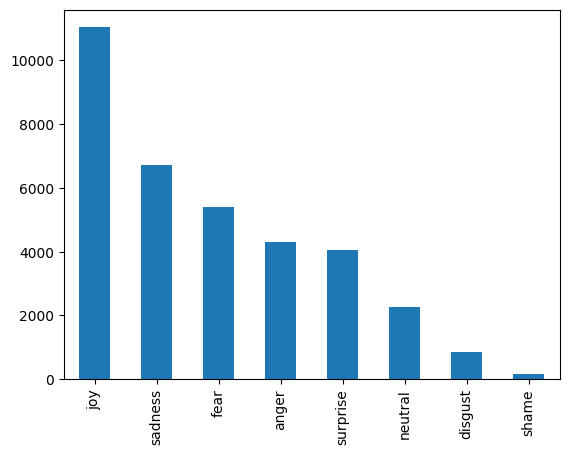

In [14]:
df['Emotion'].value_counts().plot(kind='bar')

This makes it clear that the dataset we are using is not uniformly distibuted for all the emotions and this might cause us some trouble as the ML algorithm might not detect the patterns for the emotions which have vary few examples.

<Axes: xlabel='Emotion', ylabel='count'>

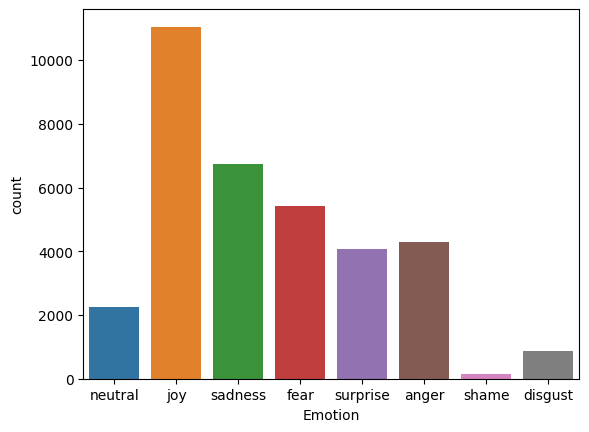

In [15]:
sns.countplot(x='Emotion',data=df)

### `Testing the function get_sentiment`

In [16]:
get_sentiment("I Love Machine Learning")

'Positive'

### `Using our Function on dataset`

In [17]:
df['Sentiment'] = df['Text'].apply(get_sentiment)

In [18]:
df.head()

Emotion                                               Text Sentiment
0  neutral                                             Why ?    Neutral
1      joy    Sage Act upgrade on my to do list for tommorow.   Neutral
2  sadness  ON THE WAY TO MY HOMEGIRL BABY FUNERAL!!! MAN ...  Negative
3      joy   Such an eye ! The true hazel eye-and so brill...  Positive
4      joy  @Iluvmiasantos ugh babe.. hugggzzz for u .!  b...   Neutral

### `Comparing The Emotion and Sentiment`

In [19]:
df.groupby(['Emotion','Sentiment']).size()

Emotion   Sentiment
anger     Negative     1787
          Neutral      1386
          Positive     1124
disgust   Negative      325
          Neutral       249
          Positive      282
fear      Negative     1534
          Neutral      1843
          Positive     2033
joy       Negative     1682
          Neutral      3648
          Positive     5715
neutral   Negative      178
          Neutral      1523
          Positive      553
sadness   Negative     2630
          Neutral      2127
          Positive     1965
shame     Negative       46
          Neutral        50
          Positive       50
surprise  Negative      623
          Neutral      1545
          Positive     1894
dtype: int64

### `Plotting The Emotion and Sentiments - Bar , CatPlot`

<Axes: xlabel='Emotion,Sentiment'>

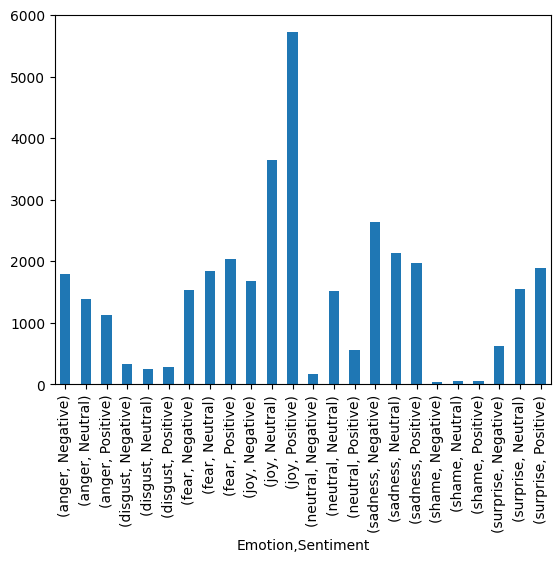

In [20]:
df.groupby(['Emotion','Sentiment']).size().plot(kind='bar')

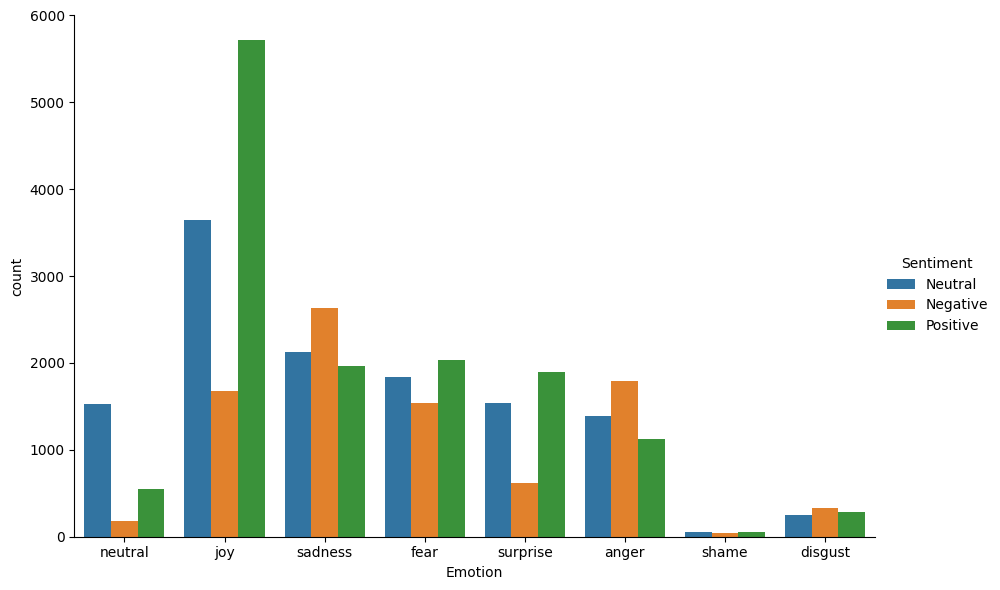

In [21]:
# Create a bar plot using catplot
sns.catplot(x="Emotion", hue="Sentiment", data=df, kind="count", height=6, aspect=1.5)

# Show the plot
plt.show()


From this we can iterpret that for joy emotion most of the statements are positive , similarly for neutral emotion most statements are neutral and for sadness, anger , disgust most of the statements are negetive.

### `Data Cleaning`

For cleaning the data we will be using neattext module.

In [22]:
dir(nfx)

['BTC_ADDRESS_REGEX',
 'CURRENCY_REGEX',
 'CURRENCY_SYMB_REGEX',
 'Counter',
 'DATE_REGEX',
 'EMAIL_REGEX',
 'EMOJI_REGEX',
 'HASTAG_REGEX',
 'MASTERCard_REGEX',
 'MD5_SHA_REGEX',
 'MOST_COMMON_PUNCT_REGEX',
 'NUMBERS_REGEX',
 'PHONE_REGEX',
 'PoBOX_REGEX',
 'SPECIAL_CHARACTERS_REGEX',
 'STOPWORDS',
 'STOPWORDS_de',
 'STOPWORDS_en',
 'STOPWORDS_es',
 'STOPWORDS_fr',
 'STOPWORDS_ru',
 'STOPWORDS_yo',
 'STREET_ADDRESS_REGEX',
 'TextFrame',
 'URL_PATTERN',
 'USER_HANDLES_REGEX',
 'VISACard_REGEX',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__generate_text',
 '__loader__',
 '__name__',
 '__numbers_dict',
 '__package__',
 '__spec__',
 '_lex_richness_herdan',
 '_lex_richness_maas_ttr',
 'clean_text',
 'defaultdict',
 'digit2words',
 'extract_btc_address',
 'extract_currencies',
 'extract_currency_symbols',
 'extract_dates',
 'extract_emails',
 'extract_emojis',
 'extract_hashtags',
 'extract_html_tags',
 'extract_mastercard_addr',
 'extract_md5sha',
 'extract_numbers',
 'extr

### `Creating Clean_Text after Removing UserHandles, StopWords, Punctuations`

In [23]:
# Remove User handles
df['Clean_Text'] = df['Text'].apply(nfx.remove_userhandles)

In [24]:
# Remove Stopwords
# df['Clean_Text'] = df['Clean_Text'].apply(nfx.remove_stopwords)

In [25]:
# Remove Punctuations
df['Clean_Text'] = df['Clean_Text'].apply(nfx.remove_punctuations)

In [26]:
df

Emotion                                               Text Sentiment  \
0       neutral                                             Why ?    Neutral   
1           joy    Sage Act upgrade on my to do list for tommorow.   Neutral   
2       sadness  ON THE WAY TO MY HOMEGIRL BABY FUNERAL!!! MAN ...  Negative   
3           joy   Such an eye ! The true hazel eye-and so brill...  Positive   
4           joy  @Iluvmiasantos ugh babe.. hugggzzz for u .!  b...   Neutral   
...         ...                                                ...       ...   
34787  surprise  @MichelGW have you gift! Hope you like it! It'...  Positive   
34788       joy  The world didnt give it to me..so the world MO...  Positive   
34789     anger                           A man robbed me today .    Neutral   
34790      fear  Youu call it JEALOUSY, I call it of #Losing YO...   Neutral   
34791   sadness  I think about you baby, and I dream about you ...   Neutral   

                                              Clean_Text  
0                                                  Why    
1         Sage Act upgrade on my to do list for tommorow  
2      ON THE WAY TO MY HOMEGIRL BABY FUNERAL MAN I H...  
3       Such an eye  The true hazel eyeand so brillia...  
4        ugh babe hugggzzz for u   babe naamazed nga ...  
...                                                  ...  
34787    have you gift Hope you like it Its hand made...  
34788  The world didnt give it to meso the world MOST...  
34789                            A man robbed me today    
34790     Youu call it JEALOUSY I call it of #Losing YOU  
34791  I think about you baby and I dream about you a...  

[34792 rows x 4 columns]

### `List Of Emotions`

In [27]:
# list of emotions
emotion_list = df['Emotion'].unique().tolist()
emotion_list

['neutral', 'joy', 'sadness', 'fear', 'surprise', 'anger', 'shame', 'disgust']

### `Creating A List, Docx For Joy`

Now lets check the most common words occuring for joy emotion.

In [28]:
joy_list = df[df['Emotion'] == 'joy']['Clean_Text'].tolist()
joy_docx = ' '.join(joy_list)

In [29]:
joy_docx

'Sage Act upgrade on my to do list for tommorow  Such an eye  The true hazel eyeand so brilliant  Regular features  open countenance  with a complexion  Oh  What a bloom of full health  and such a pretty height and size  such a firm and upright figure  There is health  not merely in her bloom  but in her air  her head  her glance  One hears sometimes of a child being  the picture of health   now  she always gives me the idea of being the complete picture of grownup health  She is loveliness itself     ugh babe hugggzzz for u   babe naamazed nga ako e babe e despite negas mas pinaramdam at fil ko ang  For once in his life  Leopold must have been truly happy : his hopes and prayers for his beloved son seemed at last to have come to fruition   I have a feeling i will fail french #fuckfrench  GoodLet  s go now   When I fell in love with \\X\\  Overnight I felt confidence selfesteem    responsible and worthwhile One could get terribly ecstatic but that would be a dangerous thing to do   Whe

### `Keywords in Joy docx`

In [30]:
keyword_joy = extract_keywords(joy_docx)
keyword_joy

{'the': 5300,
 'to': 4744,
 'I': 4471,
 'a': 3595,
 'and': 3221,
 'of': 2803,
 'my': 2793,
 'in': 2329,
 'for': 1999,
 'is': 1590,
 'with': 1375,
 'you': 1282,
 'that': 1234,
 'was': 1155,
 'me': 1144,
 'at': 1124,
 'on': 1120,
 'it': 1012,
 'have': 962,
 'be': 890,
 'this': 784,
 'day': 729,
 'amp': 678,
 'up': 658,
 'had': 639,
 'all': 636,
 'so': 603,
 'time': 602,
 'Im': 555,
 'when': 544,
 'your': 528,
 'When': 520,
 'The': 516,
 'work': 509,
 'from': 481,
 'not': 480,
 'get': 479,
 'like': 476,
 'an': 473,
 'today': 471,
 'tomorrow': 467,
 'Christmas': 453,
 'out': 453,
 'just': 452,
 'about': 450,
 'now': 442,
 'are': 438,
 'but': 402,
 'love': 393,
 'i': 387}

### `Plotting Most Common Words of Joy Docx`

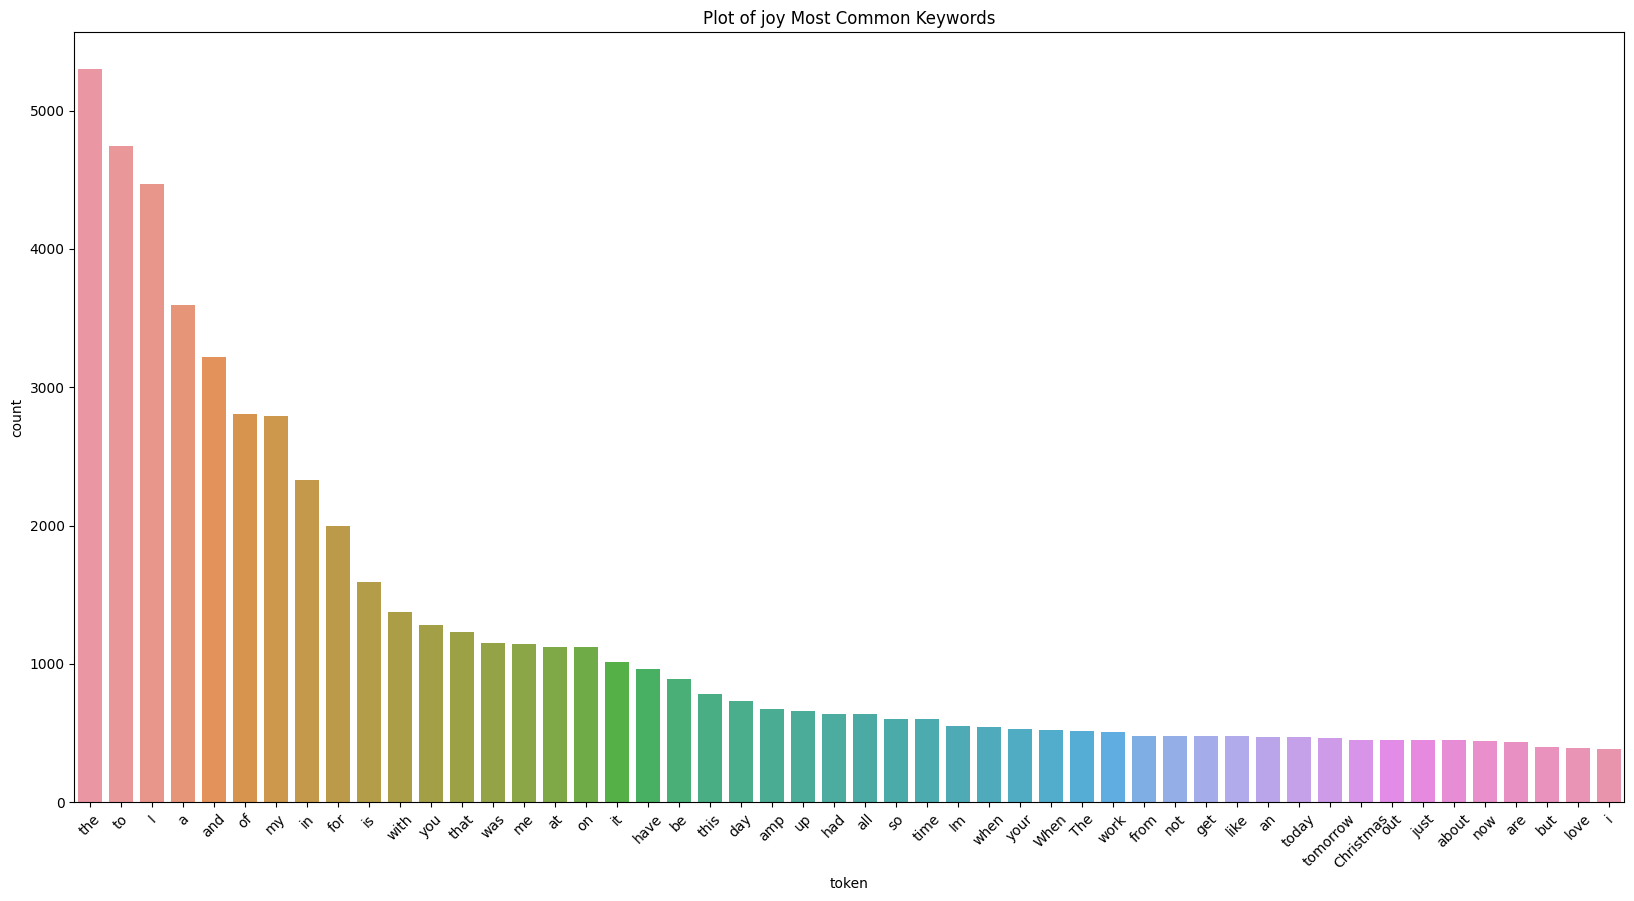

In [31]:
plot_most_common_words(keyword_joy,"joy")

### `Plotting the Word Cloud For Joy Docx`

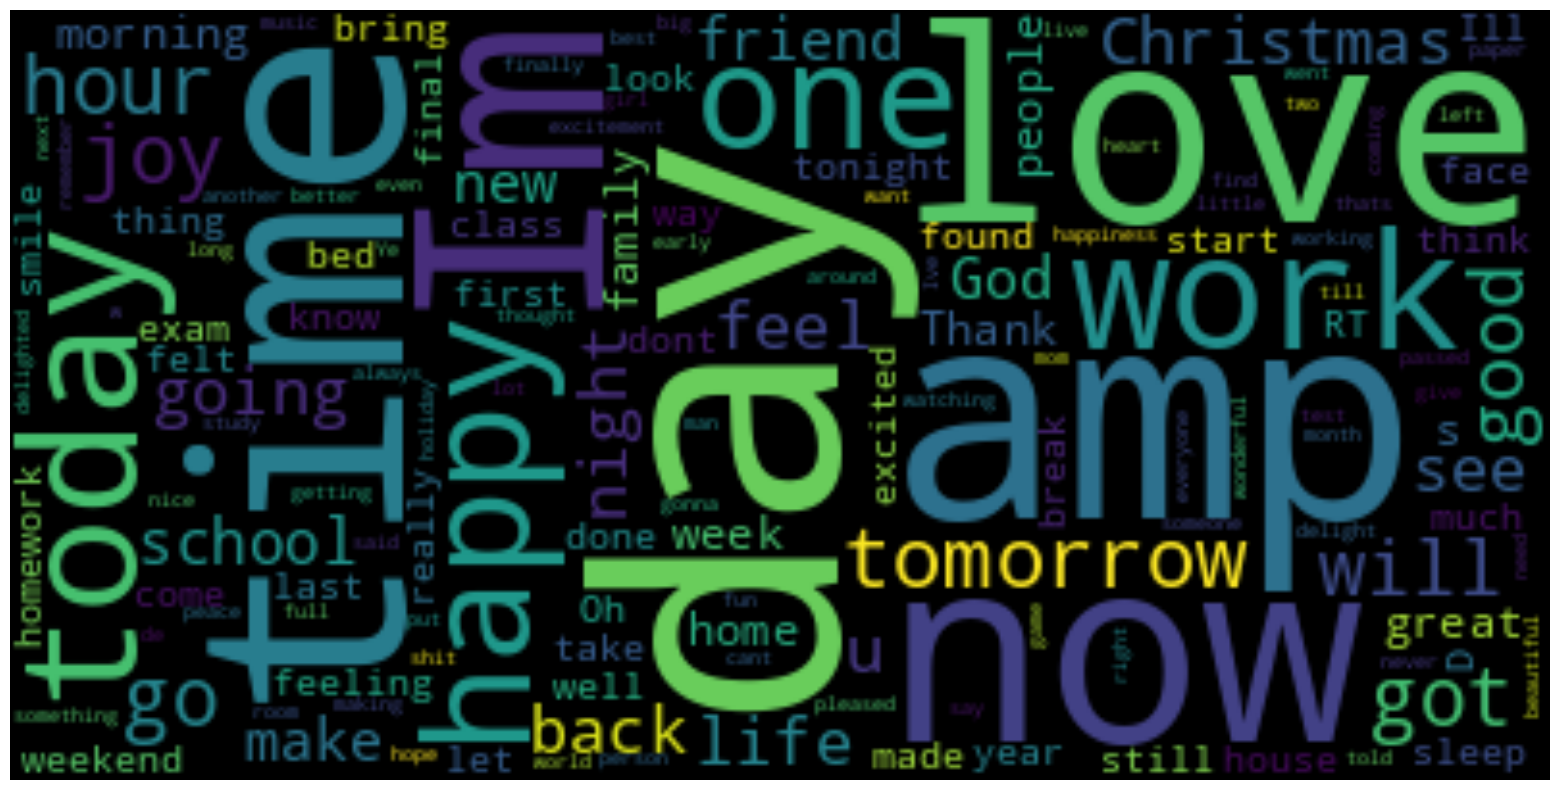

In [32]:
 plot_wordcloud(joy_docx)

This looks good and gives us the idea of which words are mostly used to express joy sentiment.

### `Performing The same for Surprise`

In [33]:
surprise_list = df[df['Emotion'] == 'surprise']['Clean_Text'].tolist()
surprise_docx = ' '.join(surprise_list)
keyword_surprise = extract_keywords(surprise_docx)

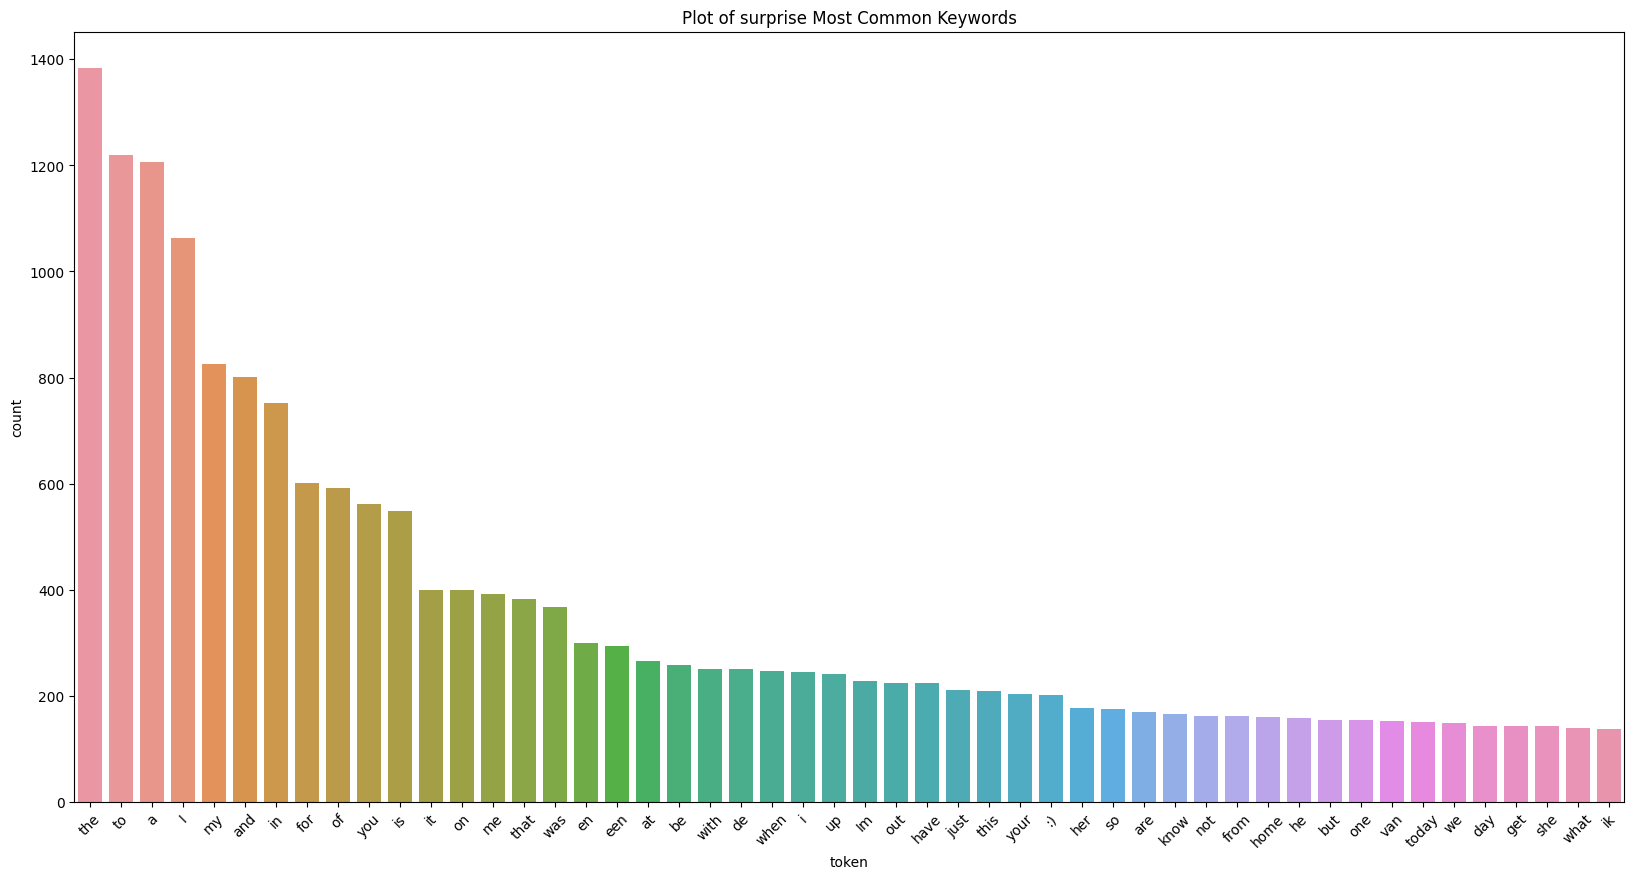

In [34]:
plot_most_common_words(keyword_surprise,"surprise")

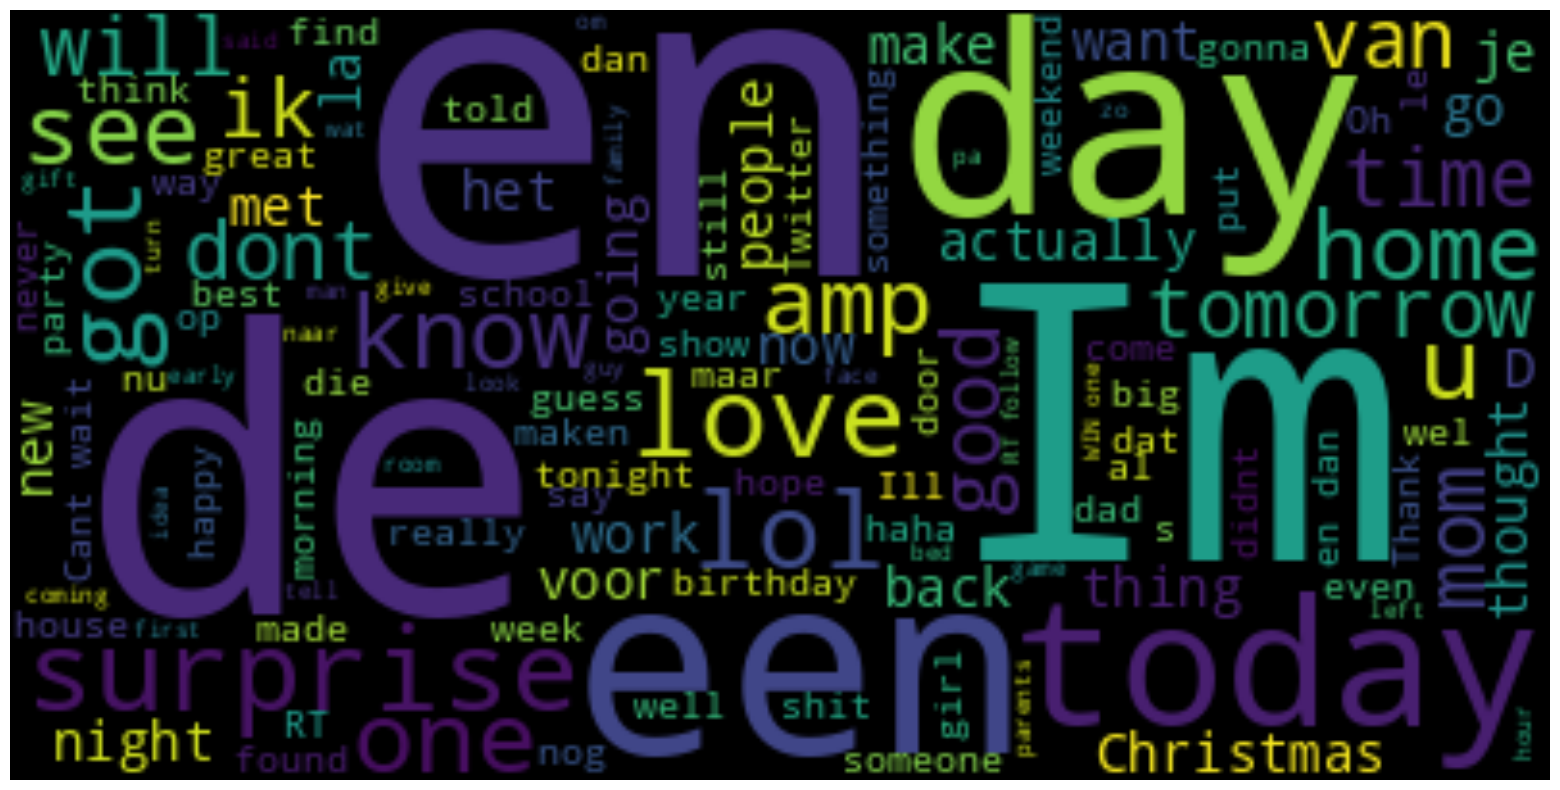

In [35]:
 plot_wordcloud(surprise_docx)

In [36]:
df['Clean_Text'] = df['Clean_Text'].apply(nfx.remove_special_characters)

The joy sentiment wordcloud looked better but after lookin at this wordcloud it is clearly visible that some more data cleaning is required as there are many noises and words with no meaning related to the sentiment.

In [37]:
df['Clean_Text'] = df['Clean_Text'].apply(nfx.remove_shortwords)

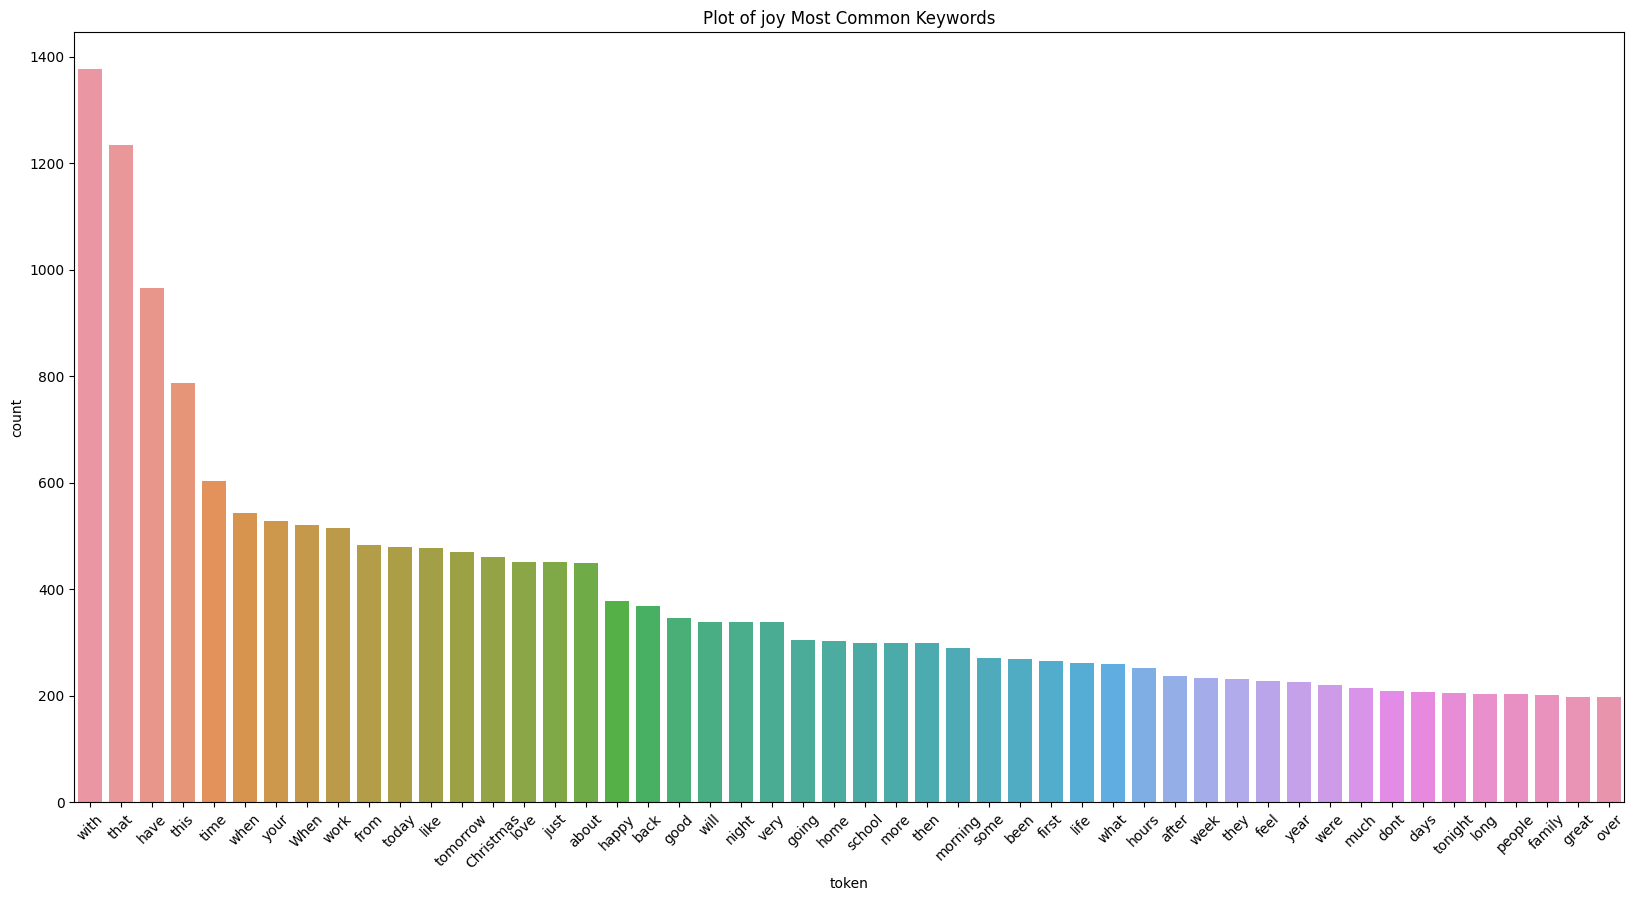

In [38]:
joy_list = df[df['Emotion'] == 'joy']['Clean_Text'].tolist()
joy_docx = ' '.join(joy_list)
keyword_joy = extract_keywords(joy_docx)
plot_most_common_words(keyword_joy,"joy")

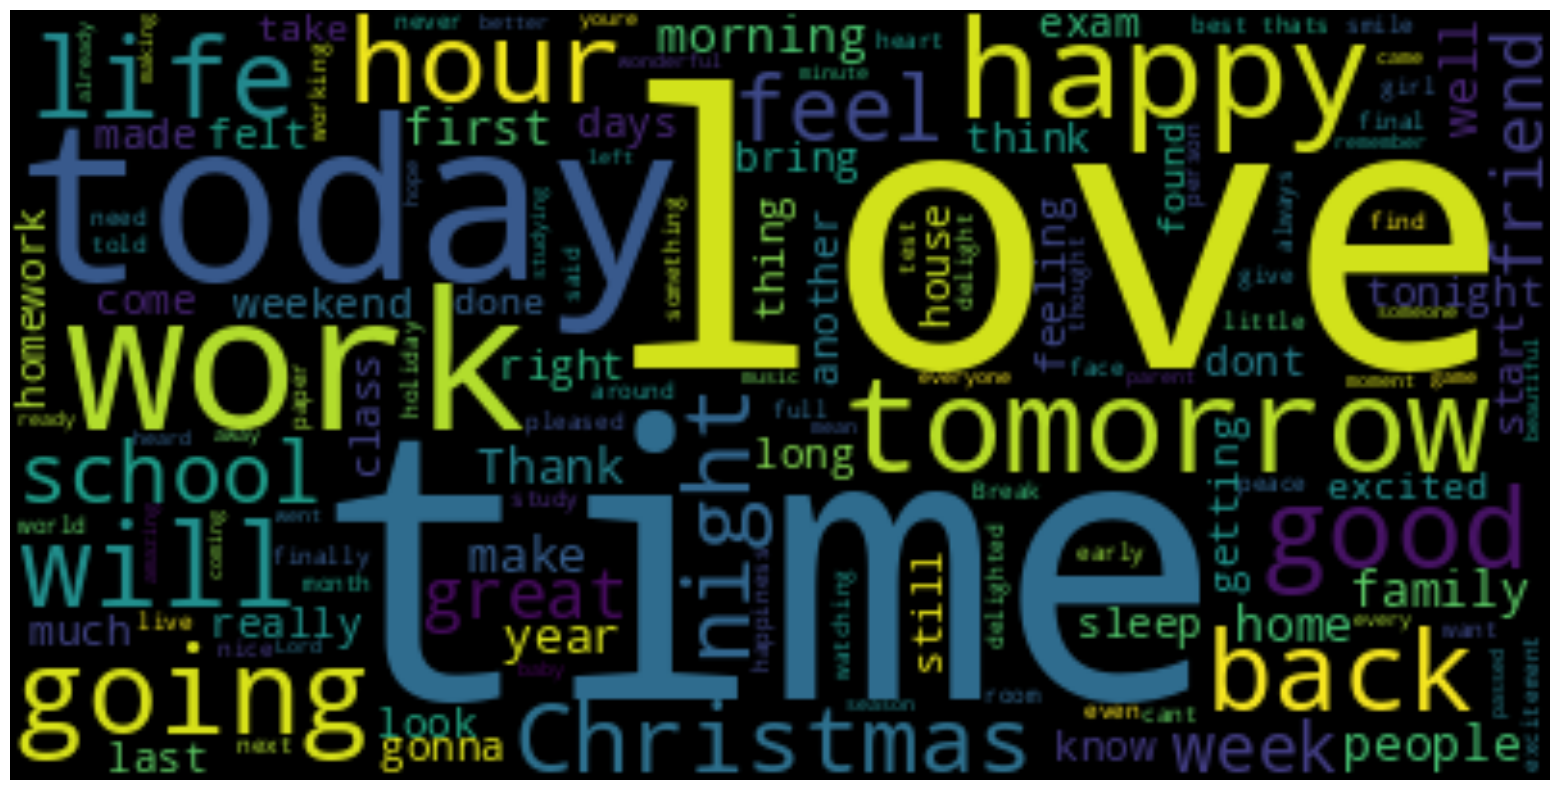

In [39]:
plot_wordcloud(joy_docx)

This looks much better than the previous ones although i still dont know how the words work and homework can be related to joy :).


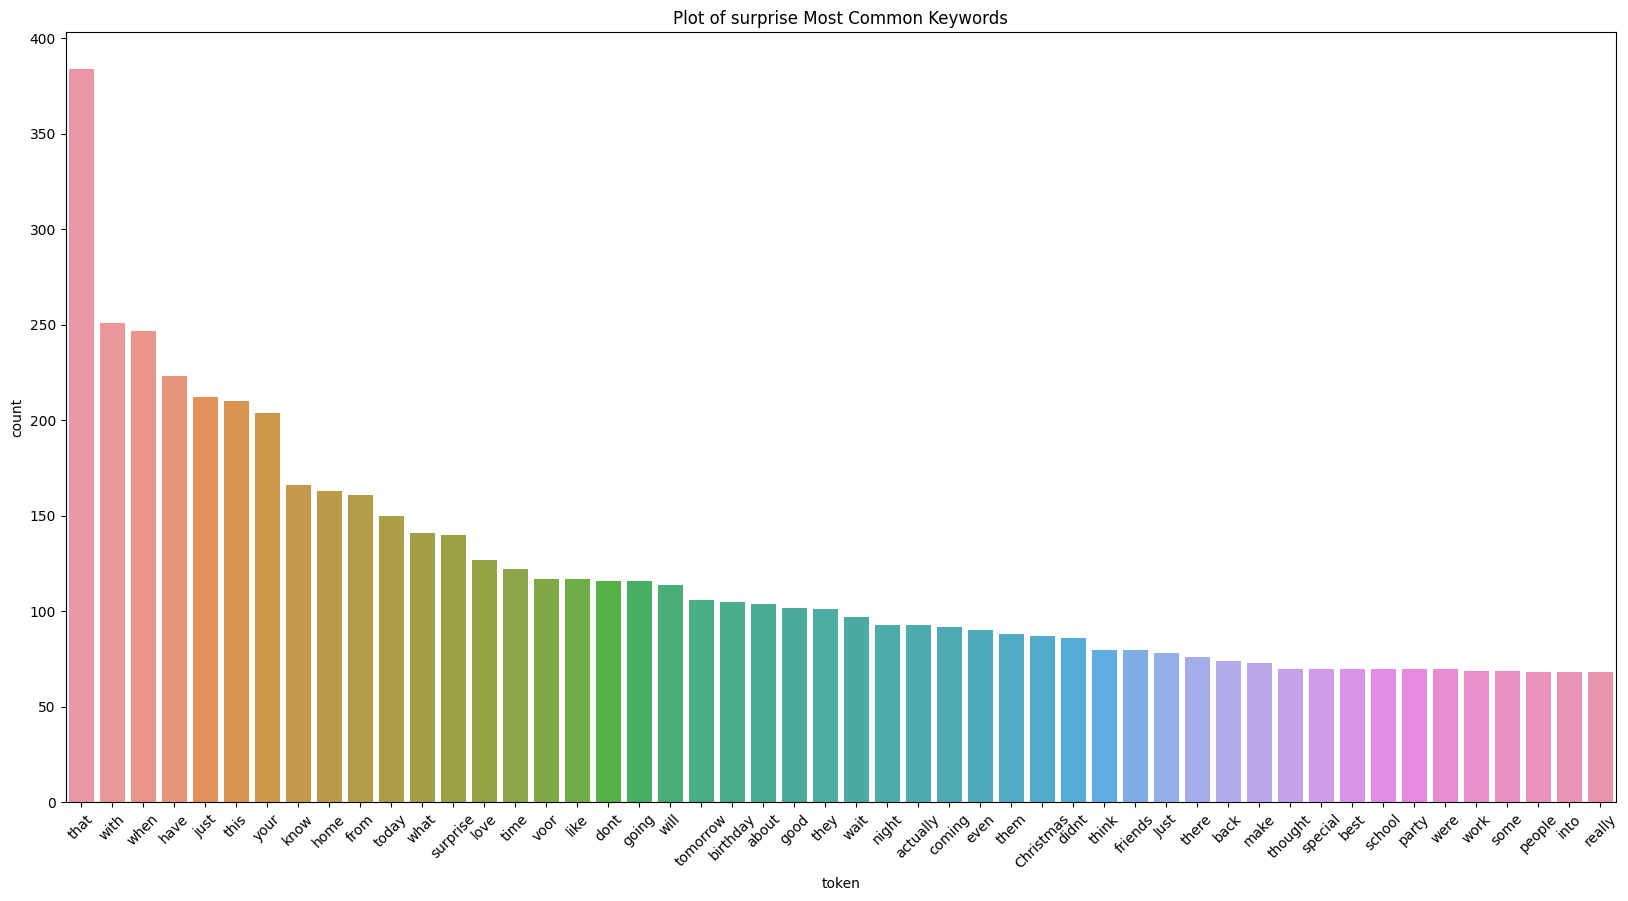

In [40]:
surprise_list = df[df['Emotion'] == 'surprise']['Clean_Text'].tolist()
surprise_docx = ' '.join(surprise_list)
keyword_surprise = extract_keywords(surprise_docx)
plot_most_common_words(keyword_surprise,"surprise")

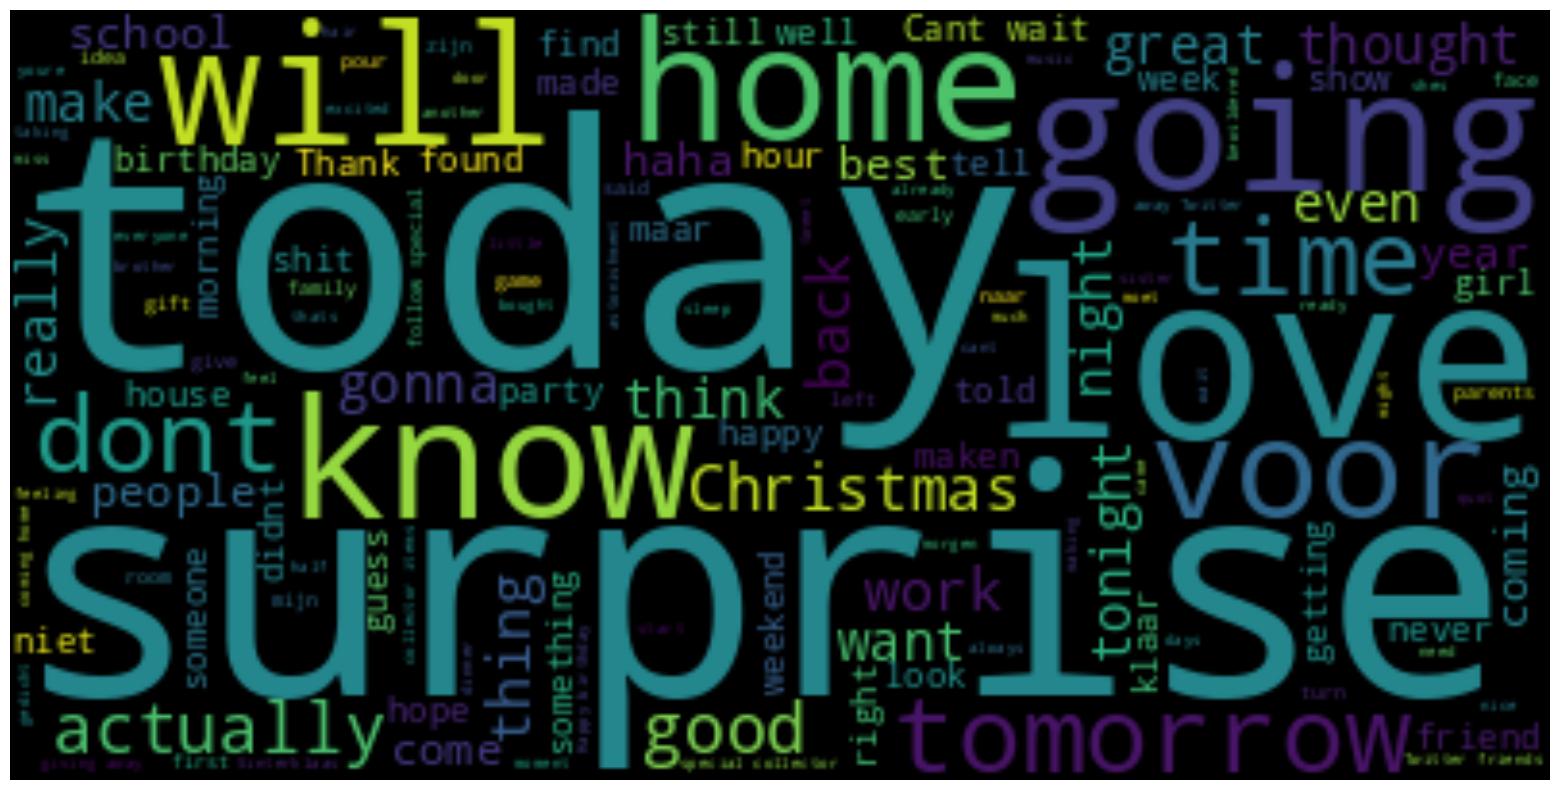

In [41]:
plot_wordcloud(surprise_docx)

This one also contains more meaningfull words than the previous wordcloud for surprise emotion.

# Trying Models
### Now it's time to try simpler models to see what results they are giving based on the data till now.

In [42]:
# Features & Labels
Xfeatures = df['Clean_Text']
ylabels = df['Emotion']

### *Splitting The dataset into Training , Testing - X,Y axis*

In [43]:
# Split Data
x_train, x_test, y_train, y_test = train_test_split(Xfeatures, ylabels, test_size=0.3, random_state=42)

# 1. **Creating The Logistic Regression Model**



In [44]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression

# Create a pipeline with CountVectorizer and a classifier (e.g., Logistic Regression)
pipe_lr = Pipeline([
    ('cv', CountVectorizer()),
    ('lr', LogisticRegression())
])


In [ ]:
# Train and fit your model
pipe_lr.fit(x_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Pipeline(steps=[('cv', CountVectorizer()), ('lr', LogisticRegression())])

In [ ]:
pipe_lr

Pipeline(steps=[('cv', CountVectorizer()), ('lr', LogisticRegression())])

In [ ]:
#Check accuracy
pipe_lr.score(x_test,y_test)

0.6094079325541292

In [ ]:
y_pred_for_lr = pipe_lr.predict(x_test)

### `Confusion Matrix`

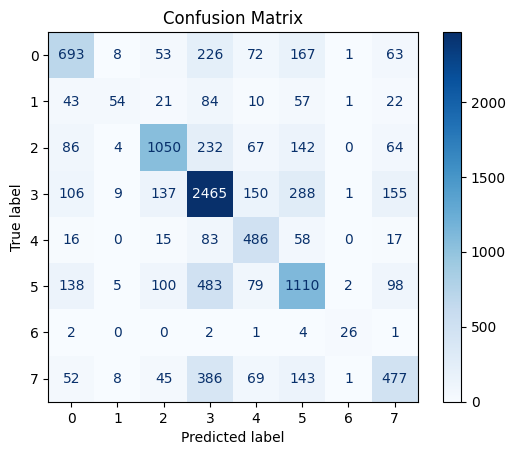

In [ ]:
calculate_and_display_confusion_matrix(y_test,y_pred_for_lr)

In [ ]:
#Make a prediction
ex1 = "This book was so interesting"

In [ ]:
pipe_lr.predict([ex1])

array(['joy'], dtype=object)

# 2. **Creating The SVM Model**

In [ ]:
from sklearn.svm import SVC  # Support Vector Machine

In [ ]:
pipe_svm = Pipeline([
    ('cv', CountVectorizer()),
    ('svm', SVC(kernel='rbf'))  # You can choose the kernel you prefer (e.g., 'linear', 'rbf', etc.)
])


In [ ]:
pipe_svm.fit(x_train, y_train)

Pipeline(steps=[('cv', CountVectorizer()), ('svm', SVC())])

In [ ]:
#Check accuracy
pipe_svm.score(x_test,y_test)

0.5998275531711056

In [ ]:
y_pred_for_svc = pipe_svm.predict(x_test)

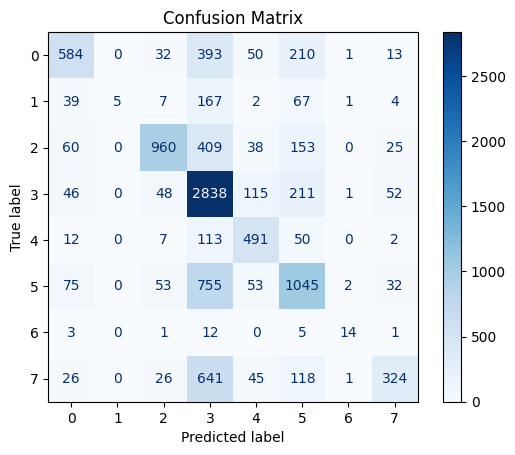

In [ ]:
calculate_and_display_confusion_matrix(y_test,y_pred_for_svc)

# 3. **Creating The RandomForestClassifier Model**

In [ ]:
from sklearn.ensemble import RandomForestClassifier

pipe_rf = Pipeline([
    ('cv', CountVectorizer()),
    ('rf', RandomForestClassifier(n_estimators=100))
])

In [ ]:
pipe_rf.fit(x_train, y_train)

Pipeline(steps=[('cv', CountVectorizer()), ('rf', RandomForestClassifier())])

In [ ]:
#Check accuracy
pipe_rf.score(x_test,y_test)

0.5701283770837325

In [ ]:
y_pred_for_rf = pipe_svm.predict(x_test)

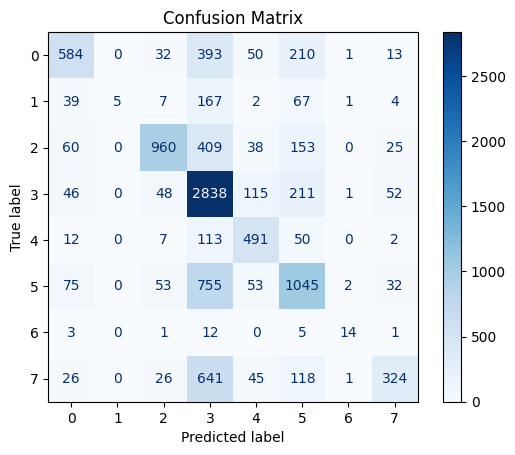

In [ ]:
calculate_and_display_confusion_matrix(y_test,y_pred_for_svc)

In all the three models above the score is almost around 55-60%. Which is desent but after looking at the confusion matrix we can see that most of the prediction are just joy sentiment (30% of ~35000 cases which is aproximatly 10500) and the model is predicting almost 5500 to be joy sentiment. Which is the reason low score and inconsistent confusion matrix.

# Complet Pipeline for test data

Completing the pipeline and trying our own text inputs will give some clear idea of the problemsin the model.

In [ ]:
from sklearn.base import BaseEstimator, TransformerMixin

# This will remove all the noises and waste material in the text input data

class TextPreprocessor(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self

    def transform(self, X):
        X_processed = X.apply(nfx.remove_userhandles)
        # X_processed = X_processed.apply(nfx.remove_stopwords)
        X_processed = X_processed.apply(nfx.remove_punctuations)
        X_processed = X_processed.apply(nfx.remove_special_characters)
        X_processed = X_processed.apply(nfx.remove_shortwords)
        return X_processed

data_proccesing = Pipeline([
    ('preprocessor', TextPreprocessor()),  # Custom text preprocessing transformer
])

Cross checking with the already existing texts.


In [ ]:
# Here using RandomForests model as the final model we get
final_model = pipe_rf

test_statements = pd.Series([
    "@Ally1kinobi thought I'd stop by and say I CAN SPEND CHRISTMAS HOLIDAYS WITH YOU NOW AT THE LAKE. Miss you!",
    '"Good morning , Jim ! "',
    "Not afraid of tomorrow for I saw yesterday and I love today #less",
    "They soud like the neighbours from hell ! "
])

processed_data = data_proccesing.fit_transform(test_statements)
predictions = final_model.predict(processed_data)
predictions

array(['surprise', 'joy', 'fear', 'anger'], dtype=object)

In [ ]:
processed_data

0    thought stop SPEND CHRISTMAS HOLIDAYS WITH LAK...
1                                         Good morning
2            afraid tomorrow yesterday love today less
3                  They soud like neighbours from hell
dtype: object

In [ ]:
def final_pipeline(text_col,model):
  final_model = model
  processed_data = data_proccesing.fit_transform(test_statements)
  predictions = final_model.predict(processed_data)
  return predictions

Trying our own text to try and break the model.


In [ ]:
test_statements = pd.Series([
    "Hello",
    "Happy to see you",
    "You are the worst",
    "never seen someone as bad as you",
    "you are not so good at it :)"
])

final_pipeline(test_statements,pipe_lr)

array(['neutral', 'joy', 'anger', 'sadness', 'neutral'], dtype=object)

The biggest issue we are facing here is that the algorithm is taking note of individual words and not the complete meaning of the sentense. And other issue is that the dataset is not evenly distributed for all the emotions to have sufficient data to train the model correctly.

# Phase 2

In [3]:
import nltk
nltk.download('stopwords')
import pandas as pd
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
import re

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [4]:
df.head()

Emotion                                               Text
0  neutral                                             Why ? 
1      joy    Sage Act upgrade on my to do list for tommorow.
2  sadness  ON THE WAY TO MY HOMEGIRL BABY FUNERAL!!! MAN ...
3      joy   Such an eye ! The true hazel eye-and so brill...
4      joy  @Iluvmiasantos ugh babe.. hugggzzz for u .!  b...

In [5]:
df.isna().any(axis=1).sum()

0

In [6]:
#text preprocessing
ps = PorterStemmer()

def preprocess(line):
    review = re.sub('[^a-zA-Z]',' ',line) #leave only charactes from a to z
    review = review.lower() #lower the text
    review = review.split() #turn string into list of words
    #apply stemming
    review = [ps.stem(word) for word in review if not word in stopwords.words('english')] #delete stop words like I , and OR
    #turn list into sentences
    return " ".join(review)

In [7]:
df["Clean_Text"] = df["Text"].apply(lambda x:preprocess(x))

In [8]:
df.head()

Emotion                                               Text  \
0  neutral                                             Why ?    
1      joy    Sage Act upgrade on my to do list for tommorow.   
2  sadness  ON THE WAY TO MY HOMEGIRL BABY FUNERAL!!! MAN ...   
3      joy   Such an eye ! The true hazel eye-and so brill...   
4      joy  @Iluvmiasantos ugh babe.. hugggzzz for u .!  b...   

                                          Clean_Text  
0                                                     
1                      sage act upgrad list tommorow  
2  way homegirl babi funer man hate funer realli ...  
3  eye true hazel eye brilliant regular featur op...  
4  iluvmiasanto ugh babe hugggzzz u babe naamaz n...

In [9]:
from sklearn import preprocessing

label_encoder = preprocessing.LabelEncoder()
df["N_label"] = label_encoder.fit_transform(df["Emotion"])
df.head()

Emotion                                               Text  \
0  neutral                                             Why ?    
1      joy    Sage Act upgrade on my to do list for tommorow.   
2  sadness  ON THE WAY TO MY HOMEGIRL BABY FUNERAL!!! MAN ...   
3      joy   Such an eye ! The true hazel eye-and so brill...   
4      joy  @Iluvmiasantos ugh babe.. hugggzzz for u .!  b...   

                                          Clean_Text  N_label  
0                                                           4  
1                      sage act upgrad list tommorow        3  
2  way homegirl babi funer man hate funer realli ...        5  
3  eye true hazel eye brilliant regular featur op...        3  
4  iluvmiasanto ugh babe hugggzzz u babe naamaz n...        3

In [10]:
#Creating the bag of words by applying CountVectoriser - convert textual data to numerical data

from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(max_features = 5000,ngram_range=(1,3))

df_cv = cv.fit_transform(df["Clean_Text"]).toarray()
df_cv

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [11]:
x_train, x_test, y_train, y_test = train_test_split(df_cv,df["N_label"], test_size=0.25,random_state=42)


In [12]:
# from imblearn.over_sampling import SMOTE
# # Apply SMOTE to the training data
# smote = SMOTE(random_state=42)
# X_resampled, y_resampled = smote.fit_resample(x_train, y_train)

In [13]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

model = Sequential()
model.add(Dense(12,input_shape=(x_train.shape[1],),activation="relu"))
model.add(Dense(8,activation="relu"))
model.add(Dropout(0.2))
model.add(Dense(8,activation="relu"))
model.add(Dense(8,activation="softmax"))

model.compile(loss="sparse_categorical_crossentropy",optimizer= "adam", metrics=['accuracy'])

model.fit(x_train,y_train,epochs= 10,batch_size=16)

# model.fit(X_resampled,y_resampled,epochs= 10,batch_size=64)

Epoch 1/10
1631/1631 [==============================] - 13s 4ms/step - loss: 1.6279 - accuracy: 0.3832
Epoch 2/10
1631/1631 [==============================] - 7s 4ms/step - loss: 1.2922 - accuracy: 0.5356
Epoch 3/10
1631/1631 [==============================] - 6s 4ms/step - loss: 1.1134 - accuracy: 0.6138
Epoch 4/10
1631/1631 [==============================] - 7s 4ms/step - loss: 1.0132 - accuracy: 0.6473
Epoch 5/10
1631/1631 [==============================] - 6s 4ms/step - loss: 0.9350 - accuracy: 0.6775
Epoch 6/10
1631/1631 [==============================] - 7s 4ms/step - loss: 0.8756 - accuracy: 0.6933
Epoch 7/10
1631/1631 [==============================] - 6s 4ms/step - loss: 0.8229 - accuracy: 0.7142
Epoch 8/10
1631/1631 [==============================] - 7s 4ms/step - loss: 0.7786 - accuracy: 0.7285
Epoch 9/10
1631/1631 [==============================] - 6s 4ms/step - loss: 0.7435 - accuracy: 0.7409
Epoch 10/10
1631/1631 [==============================] - 7s 4ms/step - loss: 0.70

In [14]:
_, accuracy = model.evaluate(x_test, y_test)
print('Accuray: %.2f' % (accuracy*100))

272/272 [==============================] - 1s 3ms/step - loss: 1.4818 - accuracy: 0.5769
Accuray: 57.69


In [15]:
pred = model.predict(x_test) # Replace with your predicted values
y_pred = np.argmax(pred, axis = 1)

272/272 [==============================] - 1s 2ms/step


In [16]:
from sklearn.metrics import f1_score
f1 = f1_score(y_test, y_pred, average='weighted')
f1

0.574278014328548

In [17]:
text= "I feel happy "
text = preprocess(text)
array = cv.transform([text]).toarray()
pred = model.predict(array)
a= np.argmax(pred, axis = 1)
label_encoder.inverse_transform(a)[0]


1/1 [==============================] - 0s 22ms/step


'joy'

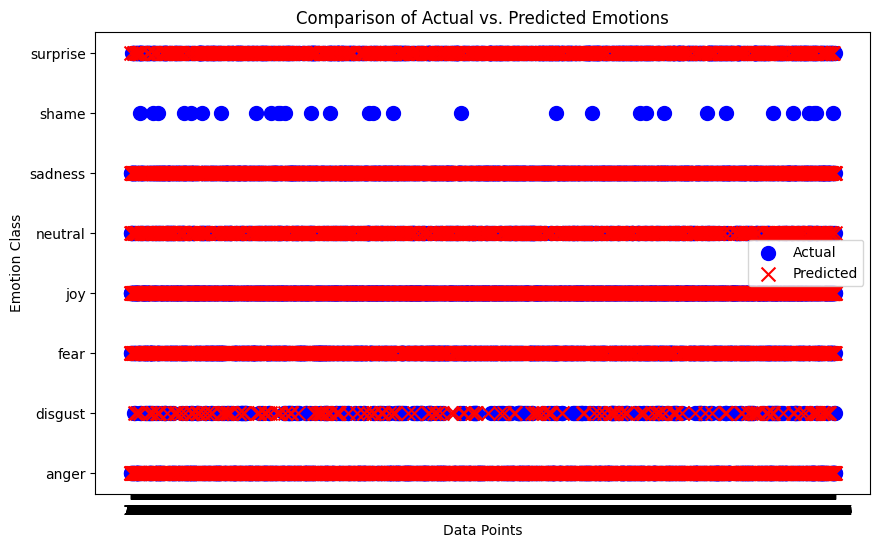

In [18]:
import matplotlib.pyplot as plt

# Assuming 'y_true' is your actual values and 'y_pred' is your predicted values
# Replace 'y_true' and 'y_pred' with your actual and predicted values

y_true = y_test  # Replace with your actual values
y_pred = y_pred

# Define emotion labels based on your problem (e.g., happy, sad, neutral)
distinct_labels = label_encoder.classes_

# Create a figure and axis
fig, ax = plt.subplots(figsize=(10, 6))

# Plot actual values
ax.scatter(range(len(y_true)), y_true, color='blue', label='Actual', marker='o', s=100)

# Plot predicted values
ax.scatter(range(len(y_pred)), y_pred, color='red', label='Predicted', marker='x', s=100)

# Set axis labels and title
ax.set_xlabel('Data Points')
ax.set_ylabel('Emotion Class')
ax.set_title('Comparison of Actual vs. Predicted Emotions')

# Set x-axis ticks with data point indices
ax.set_xticks(range(len(y_true)))
ax.set_xticklabels([str(i) for i in range(len(y_true))])

# Set y-axis ticks with emotion labels
ax.set_yticks(range(len(distinct_labels)))
ax.set_yticklabels(distinct_labels)

# Add a legend
ax.legend()

# Show the plot
plt.show()

In [ ]:
import re # regex
import pandas as pd # tables
import matplotlib.pyplot as plt # plots
import seaborn as sns # plots
import numpy as np # operations with arrays and matrices
from sklearn.preprocessing import LabelEncoder

In [ ]:
# Encode the labels
label_encoder = LabelEncoder()
df["Labels"] = label_encoder.fit_transform(df["Emotion"])

In [ ]:
def visualize_labels_distribution(df, title='the'):
  '''
  Accepts a dataframe with 'Emotions' column and dataset title (e.g. 'train')
  Creates bar chart with num of elements of each category
  Returns nothing

  '''
  # create a pandas series with labels and their counts
  num_labels = df['Emotion'].value_counts()

  # num of unique categories
  x_barchart = range(df['Emotion'].nunique())
  # list of labels
  x_barchart_labels = num_labels.keys()

  # list of counts
  y_barchart = list(num_labels.values)

  # creating bar chart
  plt.figure(figsize = (5, 4))
  plt.bar(x_barchart, y_barchart, color='#707bfb')

  # adding num of elements for each category on plot as text
  for index, data in enumerate(y_barchart):
    plt.text(x = index,
            y = data+max(y_barchart)/100,
            s = '{}'.format(data),
            fontdict = dict(fontsize=10),
            ha = 'center',)

  plt.xticks(x_barchart, x_barchart_labels, rotation=40)
  plt.title('Num of elements of each category for {} dataset'.format(title))
  plt.tight_layout()

  print('There are {} records in the dataset.\n'.format(len(df.index)))

  plt.show()

There are 34792 records in the dataset.



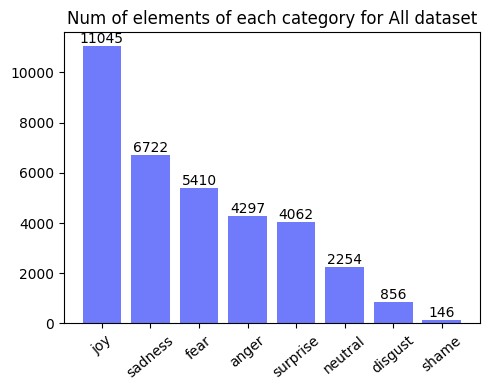

In [ ]:
visualize_labels_distribution(df, 'All')

In [ ]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')
from nltk.corpus import stopwords

# downloading a set of stop-words
STOPWORDS = set(stopwords.words('english'))

# tokenizer
from nltk.tokenize import word_tokenize

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
def text_preprocess(text, stop_words=False):
  '''
  Accepts text (a single string) and
  a parameters of preprocessing
  Returns preprocessed text

  '''
  # clean text from non-words
  text = re.sub(r'\W+', ' ', text).lower()

  # tokenize the text
  tokens = word_tokenize(text)

  if stop_words:
    # delete stop_words
    tokens = [token for token in tokens if token not in STOPWORDS]

  return tokens

In [ ]:
train, temp = train_test_split(df, test_size=0.2, random_state=42)
validation, test = train_test_split(temp, test_size=0.5, random_state=42)

In [ ]:
print('Before: ')
print(df.head())

x_train = [text_preprocess(t, stop_words=True) for t in train['Text']]
y_train = train['Labels'].values

print('\nAfter:')
for line_and_label in list(zip(x_train[:5], y_train[:5])):
  print(line_and_label)

Before: 
   Emotion                                               Text  Labels
0  neutral                                             Why ?        4
1      joy    Sage Act upgrade on my to do list for tommorow.       3
2  sadness  ON THE WAY TO MY HOMEGIRL BABY FUNERAL!!! MAN ...       5
3      joy   Such an eye ! The true hazel eye-and so brill...       3
4      joy  @Iluvmiasantos ugh babe.. hugggzzz for u .!  b...       3

After:
(['yes', 'to', 'our', 'first', 'anniversary', 'and', 'many', 'more', 'to', 'come', 'cheers'], 3)
(['don', 't', 'you', 'think', 'it', 's', 'too', 'bloody'], 4)
(['peace', 'is', 'that', 'state', 'in', 'which', 'fear', 'of', 'any', 'kind', 'is', 'unknown', 'john', 'buchan', 'fill', 'your', 'w', 'love', 'it', 'is', 'no', 'match'], 2)
(['when', 'fat', 'bitches', 'complain', 'about', 'their', 'weight', 'no', 'one', 'told', 'you', 'to', 'eat', 'mcdonalds'], 0)
(['heb', 'een', 'lolly', 'gekregen', 'met', '12', 'lolly', 's', 'erin', 'en', '18', 'chocolade', 'munten'

In [ ]:

x_test = [text_preprocess(t, stop_words=True) for t in test['Text']]
y_test = test['Labels'].values

x_validation = [text_preprocess(t, stop_words=True) for t in validation['Text']]
y_validation = validation['Labels'].values

In [ ]:
# load pre-trained model
import gensim.downloader as api
model_wiki = api.load('fasttext-wiki-news-subwords-300')

[==================================================] 100.0% 958.5/958.4MB downloaded


In [ ]:
from gensim.models import Word2Vec

# train word2vec model on the corpus
model_w2v = Word2Vec(x_train + x_test + x_validation,   # data for model to train on
                 vector_size = 300,                            # embedding vector size
                 min_count = 2).wv

In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer

In [ ]:
DICT_SIZE = 15000

# creating a dictionary with most used words
# where num of words = DICT_SIZE
tokenizer = Tokenizer(num_words=DICT_SIZE)
total = x_train + x_train + x_validation
tokenizer.fit_on_texts(total)

In [ ]:
# words and their indexes
list(tokenizer.word_index.items())[:5]

[('i', 1), ('the', 2), ('to', 3), ('a', 4), ('and', 5)]

In [ ]:
# number of unique words in the corpus
len(tokenizer.word_index)

34991

In [ ]:
# find max length of sentences across all parts of the dataset
x_train_max_len = max([len(i) for i in x_train])
x_test_max_len = max([len(i) for i in x_test])
x_validation_max_len = max([len(i) for i in x_validation])

MAX_LEN = max(x_train_max_len, x_test_max_len, x_validation_max_len)
MAX_LEN

231

In [ ]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [ ]:
# replace words with their indexes,
# change size of vectors to MAX_LEN and pad indexes
X_train = tokenizer.texts_to_sequences(x_train)
X_train_pad = pad_sequences(X_train, maxlen=MAX_LEN)

X_test = tokenizer.texts_to_sequences(x_test)
X_test_pad = pad_sequences(X_test, maxlen=MAX_LEN)

X_val = tokenizer.texts_to_sequences(x_validation)
X_val_pad = pad_sequences(X_val, maxlen=MAX_LEN)

In [ ]:
# words are replaced by their indexes
X_train[0]

[201, 3, 89, 106, 2235, 5, 241, 83, 3, 155, 3615]

In [ ]:
# sentence after padding
X_train_pad[0]

array([   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,   

In [ ]:
def create_weight_matrix(model, second_model=False):
  '''
  Accepts word embedding model
  and the second model, if provided
  Returns weight matrix of size m*n, where
  m - size of the dictionary
  n - size of the word embedding vector

  '''
  vector_size = model.get_vector('like').shape[0]
  w_matrix = np.zeros((DICT_SIZE, vector_size))
  skipped_words = []

  for word, index in tokenizer.word_index.items():
    if index < DICT_SIZE:
      if word in model.key_to_index:
        w_matrix[index] = model.get_vector(word)
      else:
        if second_model:
          if word in second_model.key_to_index:
            w_matrix[index] = second_model.get_vector(word)
          else:
            skipped_words.append(word)
        else:
          skipped_words.append(word)

  print(f'{len(skipped_words)} words were skipped. Some of them:')
  print(skipped_words[:50])
  return w_matrix

In [ ]:
weight_matrix = create_weight_matrix(model_wiki, model_w2v)

0 words were skipped. Some of them:
[]


In [ ]:
weight_matrix.shape

(15000, 300)

In [ ]:
weight_matrix

array([[ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [-6.04179986e-02,  6.99549988e-02,  5.31730019e-02, ...,
        -4.77880007e-03,  3.38319987e-02, -2.06300005e-01],
       [ 2.42490005e-02,  4.82349982e-03,  1.84109993e-02, ...,
        -3.49600017e-02,  1.83610003e-02,  3.48560000e-03],
       ...,
       [-3.81510006e-03, -3.24070007e-02,  2.88679991e-02, ...,
         2.85689998e-02, -3.27849993e-03,  7.11510004e-03],
       [-8.34610034e-03,  1.56500004e-02,  7.87440035e-03, ...,
         3.47520001e-02, -3.01900003e-02,  1.71830002e-02],
       [ 1.90158421e-03, -4.65779519e-03,  4.70544351e-03, ...,
        -8.06983002e-03,  1.32767959e-02,  1.11126130e-04]])

In [ ]:
# import models, layers, optimizers from tensorflow
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Bidirectional, Dense, Dropout
from tensorflow.keras.optimizers import Adam

In [ ]:
# import and initialize early stopping
from tensorflow.keras.callbacks import EarlyStopping
stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=3)

In [ ]:
# initialize sequential model
model = Sequential()
model.add(Embedding(input_dim = DICT_SIZE, # the whole vocabulary size
                    output_dim = weight_matrix.shape[1], # vector space dimension
                    input_length = X_train_pad.shape[1], # max_len of text sequence
                    weights=[weight_matrix], # assign the embedding weight with embedding marix
                    trainable=False)) # set the weight to be not trainable (static)

In [ ]:
model.add(Bidirectional(LSTM(64, return_sequences=True)))
model.add(Dropout(0.2))
model.add(Bidirectional(LSTM(128, return_sequences=True)))
model.add(Dropout(0.2))
model.add(Bidirectional(LSTM(64, return_sequences=False)))
model.add(Dense(8, activation = 'softmax'))
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics='accuracy')

In [ ]:
history = model.fit(X_train_pad, y_train,
                    validation_data = (X_val_pad, y_validation),
                    batch_size = 64,
                    epochs = 20,
                    callbacks = stop)

Epoch 1/20
435/435 [==============================] - 40s 68ms/step - loss: 1.4652 - accuracy: 0.4473 - val_loss: 1.2963 - val_accuracy: 0.5260
Epoch 2/20
435/435 [==============================] - 27s 62ms/step - loss: 1.2408 - accuracy: 0.5532 - val_loss: 1.2116 - val_accuracy: 0.5654
Epoch 3/20
435/435 [==============================] - 28s 65ms/step - loss: 1.1552 - accuracy: 0.5887 - val_loss: 1.1427 - val_accuracy: 0.5847
Epoch 4/20
435/435 [==============================] - 27s 62ms/step - loss: 1.1081 - accuracy: 0.6034 - val_loss: 1.1210 - val_accuracy: 0.5999
Epoch 5/20
435/435 [==============================] - 28s 65ms/step - loss: 1.0631 - accuracy: 0.6177 - val_loss: 1.1039 - val_accuracy: 0.6082
Epoch 6/20
435/435 [==============================] - 28s 64ms/step - loss: 1.0251 - accuracy: 0.6346 - val_loss: 1.0897 - val_accuracy: 0.6019
Epoch 7/20
435/435 [==============================] - 27s 62ms/step - loss: 0.9895 - accuracy: 0.6439 - val_loss: 1.0673 - val_accuracy:

In [ ]:
model.evaluate(X_test_pad, y_test)

109/109 [==============================] - 2s 22ms/step - loss: 1.0861 - accuracy: 0.6330


[1.0861282348632812, 0.6330459713935852]

109/109 [==============================] - 5s 25ms/step


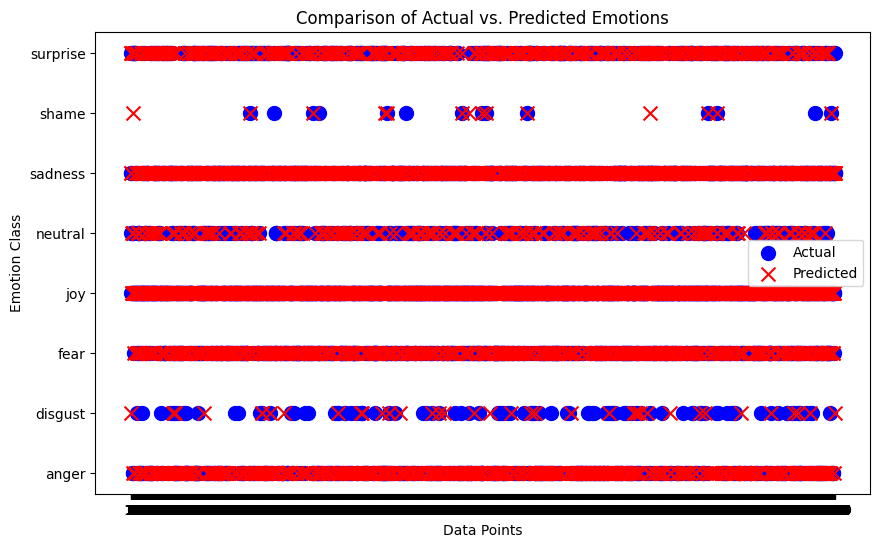

In [ ]:
import matplotlib.pyplot as plt

# Assuming 'y_true' is your actual values and 'y_pred' is your predicted values
# Replace 'y_true' and 'y_pred' with your actual and predicted values

y_true = y_test  # Replace with your actual values
y_pred = np.argmax(model.predict(X_test_pad), axis=1)

# Define emotion labels based on your problem (e.g., happy, sad, neutral)
emotion_labels = label_encoder.classes_

# Create a figure and axis
fig, ax = plt.subplots(figsize=(10, 6))

# Plot actual values
ax.scatter(range(len(y_true)), y_true, color='blue', label='Actual', marker='o', s=100)

# Plot predicted values
ax.scatter(range(len(y_pred)), y_pred, color='red', label='Predicted', marker='x', s=100)

# Set axis labels and title
ax.set_xlabel('Data Points')
ax.set_ylabel('Emotion Class')
ax.set_title('Comparison of Actual vs. Predicted Emotions')

# Set x-axis ticks with data point indices
ax.set_xticks(range(len(y_true)))
ax.set_xticklabels([str(i) for i in range(len(y_true))])

# Set y-axis ticks with emotion labels
ax.set_yticks(range(len(emotion_labels)))
ax.set_yticklabels(emotion_labels)

# Add a legend
ax.legend()

# Show the plot
plt.show()

In [ ]:
import pandas as pd

# Assuming 'emotion' is the column containing different emotions
# Replace 'df' with the actual name of your DataFrame
df['Emotion'] = df['Emotion'].replace({'shame': 'sadness', 'fear': 'sadness', 'disgust': 'anger', 'surprise': 'joy'})

# If you want to verify the changes, you can print the updated DataFrame
df.head()


Emotion                                               Text  \
0  neutral                                             Why ?    
1      joy    Sage Act upgrade on my to do list for tommorow.   
2  sadness  ON THE WAY TO MY HOMEGIRL BABY FUNERAL!!! MAN ...   
3      joy   Such an eye ! The true hazel eye-and so brill...   
4      joy  @Iluvmiasantos ugh babe.. hugggzzz for u .!  b...   

                                          Clean_Text  N_label  
0                                                           4  
1                      sage act upgrad list tommorow        3  
2  way homegirl babi funer man hate funer realli ...        5  
3  eye true hazel eye brilliant regular featur op...        3  
4  iluvmiasanto ugh babe hugggzzz u babe naamaz n...        3

In [ ]:
df["Clean_Text"] = df["Text"].apply(lambda x:preprocess(x))

In [ ]:
from sklearn import preprocessing

label_encoder = preprocessing.LabelEncoder()
df["N_label"] = label_encoder.fit_transform(df["Emotion"])
df.head()

Emotion                                               Text  \
0  neutral                                             Why ?    
1      joy    Sage Act upgrade on my to do list for tommorow.   
2  sadness  ON THE WAY TO MY HOMEGIRL BABY FUNERAL!!! MAN ...   
3      joy   Such an eye ! The true hazel eye-and so brill...   
4      joy  @Iluvmiasantos ugh babe.. hugggzzz for u .!  b...   

                                          Clean_Text  N_label  Labels  
0                                                           2       2  
1                      sage act upgrad list tommorow        1       1  
2  way homegirl babi funer man hate funer realli ...        3       3  
3  eye true hazel eye brilliant regular featur op...        1       1  
4  iluvmiasanto ugh babe hugggzzz u babe naamaz n...        1       1

In [ ]:
#Creating the bag of words by applying CountVectoriser - convert textual data to numerical data

from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(max_features = 5000,ngram_range=(1,3))

df_cv = cv.fit_transform(df["Clean_Text"]).toarray()
df_cv

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(df_cv,df["N_label"], test_size=0.25,random_state=42)


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

model = Sequential()
model.add(Dense(12,input_shape=(x_train.shape[1],),activation="relu"))
model.add(Dense(8,activation="relu"))
model.add(Dropout(0.2))
model.add(Dense(8,activation="relu"))
model.add(Dense(8,activation="softmax"))

model.compile(loss="sparse_categorical_crossentropy",optimizer= "adam", metrics=['accuracy'])

model.fit(x_train,y_train,epochs= 10,batch_size=16)

Epoch 1/10
1631/1631 [==============================] - 7s 4ms/step - loss: 1.0632 - accuracy: 0.5502
Epoch 2/10
1631/1631 [==============================] - 7s 4ms/step - loss: 0.7789 - accuracy: 0.6828
Epoch 3/10
1631/1631 [==============================] - 6s 4ms/step - loss: 0.6672 - accuracy: 0.7474
Epoch 4/10
1631/1631 [==============================] - 7s 4ms/step - loss: 0.5994 - accuracy: 0.7798
Epoch 5/10
1631/1631 [==============================] - 6s 4ms/step - loss: 0.5402 - accuracy: 0.8008
Epoch 6/10
1631/1631 [==============================] - 7s 4ms/step - loss: 0.4933 - accuracy: 0.8199
Epoch 7/10
1631/1631 [==============================] - 6s 4ms/step - loss: 0.4524 - accuracy: 0.8343
Epoch 8/10
1631/1631 [==============================] - 7s 4ms/step - loss: 0.4072 - accuracy: 0.8518
Epoch 9/10
1631/1631 [==============================] - 6s 4ms/step - loss: 0.3803 - accuracy: 0.8631
Epoch 10/10
1631/1631 [==============================] - 7s 4ms/step - loss: 0.354

In [ ]:
_, accuracy = model.evaluate(x_test, y_test)
print('Accuray: %.2f' % (accuracy*100))

272/272 [==============================] - 1s 3ms/step - loss: 1.1673 - accuracy: 0.6950
Accuray: 69.50


In [ ]:
text= "I feel happy "
text = preprocess(text)
array = cv.transform([text]).toarray()
pred = model.predict(array)
a= np.argmax(pred, axis = 1)
label_encoder.inverse_transform(a)[0]


1/1 [==============================] - 0s 54ms/step


'joy'

272/272 [==============================] - 1s 2ms/step


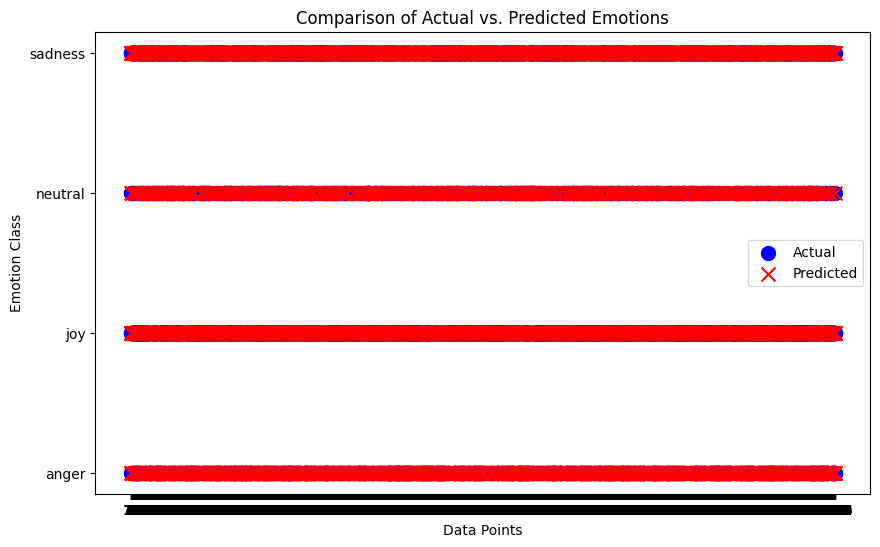

In [ ]:
import matplotlib.pyplot as plt

# Assuming 'y_true' is your actual values and 'y_pred' is your predicted values
# Replace 'y_true' and 'y_pred' with your actual and predicted values

y_true = y_test  # Replace with your actual values
pred = model.predict(x_test) # Replace with your predicted values
y_pred = np.argmax(pred, axis = 1)

# Define emotion labels based on your problem (e.g., happy, sad, neutral)
distinct_labels = label_encoder.classes_

# Create a figure and axis
fig, ax = plt.subplots(figsize=(10, 6))

# Plot actual values
ax.scatter(range(len(y_true)), y_true, color='blue', label='Actual', marker='o', s=100)

# Plot predicted values
ax.scatter(range(len(y_pred)), y_pred, color='red', label='Predicted', marker='x', s=100)

# Set axis labels and title
ax.set_xlabel('Data Points')
ax.set_ylabel('Emotion Class')
ax.set_title('Comparison of Actual vs. Predicted Emotions')

# Set x-axis ticks with data point indices
ax.set_xticks(range(len(y_true)))
ax.set_xticklabels([str(i) for i in range(len(y_true))])

# Set y-axis ticks with emotion labels
ax.set_yticks(range(len(distinct_labels)))
ax.set_yticklabels(distinct_labels)

# Add a legend
ax.legend()

# Show the plot
plt.show()